In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#设置全局默认字体 为 雅黑
plt.rcParams['font.family'] = ['Microsoft YaHei'] 
# 设置全局轴标签字典大小
plt.rcParams["axes.labelsize"] = 14  
# 设置背景
sns.set_style("darkgrid",{"font.family":['Microsoft YaHei', 'SimHei']})  

## Step 1. 数据概览

In [3]:
data = pd.read_excel(r"汽车之家数据.xlsx")

# Display the first few rows of the dataset
data.head()



,Unnamed: 0,标题,价格,新车含税价,标签,表显里程,上牌时间,挡位,排量,车辆所在地,...,所在地,发动机,车辆级别,车身颜色,驱动方式,标准容量,标准快充,标准慢充,NEDC纯电续航里程,CLTC纯电续航里程
0,0,奥迪A6L新能源 2022款 55 TFSI e quattro,34.98,55.14万,准新车、品牌认证,0.41万公里,2022年10月,自动,2L,成都,...,成都,2.0T 252马力 L4,中大型车,黑色,前置四驱,14kwh,-小时,-小时,NaN,NaN
1,1,宝马5系新能源 2021款 535Le 豪华套装,31.80,54.26万,0次过户、原厂质保,3.11万公里,2021年03月,自动,2L,厦门,...,厦门,2.0T 184马力 L4,中大型车,白色,前置后驱,18kwh,-小时,3.9小时,NaN,NaN
2,2,宝马iX 2022款 xDrive40,37.40,81.07万,新上架、准新车,0.4万公里,2022年11月,自动,0L,天津,...,天津,纯电动 326马力,中大型SUV,绿色,双电机四驱,77kwh,0.68小时,7.25小时,NaN,NaN
3,3,欧拉好猫 2021款 400km标准续航 雅典娜版 磷酸铁锂,8.58,13.45万,新上架、0次过户,2.4万公里,2021年12月,自动,0L,武汉,...,武汉,纯电动 143马力,小型车,红/紫色,前置前驱,48kwh,0.5小时,8小时,401km,NaN
4,4,奥迪Q2L e-tron 2019款 Q2L e-tron 纯电智享型,10.68,25.76万,新上架、品牌认证,6.8万公里,2020年12月,自动,0L,成都,...,成都,纯电动 136马力,小型SUV,银/灰色,前置前驱,40kwh,0.6小时,17小时,265km,NaN


In [4]:
data.to_excel('output.xlsx', index=True)  # 同样可以设置index=False来避免保存索引列

In [5]:
# 1. 查看数据集的基本信息
data_info = data.info()

# 2. 描述性统计
descriptive_stats = data.describe()

data_info, descriptive_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24046 entries, 0 to 24045
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24046 non-null  int64  
 1   标题          24046 non-null  object 
 2   价格          23641 non-null  float64
 3   新车含税价       24037 non-null  object 
 4   标签          19118 non-null  object 
 5   表显里程        24046 non-null  object 
 6   上牌时间        24046 non-null  object 
 7   挡位          24046 non-null  object 
 8   排量          24046 non-null  object 
 9   车辆所在地       24046 non-null  object 
 10  查看限迁地       24046 non-null  object 
 11  变速箱         24046 non-null  object 
 12  燃料类型        24045 non-null  object 
 13  WLTC纯电续航里程  5366 non-null   object 
 14  发布时间        24046 non-null  object 
 15  年检到期        24046 non-null  object 
 16  保险到期        24046 non-null  object 
 17  过户次数        24046 non-null  object 
 18  所在地         24046 non-null  object 
 19  发动机         24046 non-nul

(None,
          Unnamed: 0            价格
 count  24046.000000  23641.000000
 mean   12022.500000     22.164179
 std     6941.626623     42.354589
 min        0.000000      0.780000
 25%     6011.250000      8.280000
 50%    12022.500000     14.980000
 75%    18033.750000     22.800000
 max    24045.000000    758.000000)

## Step 2. 车辆级别和车身颜色对价格的影响如何？

要分析车辆级别和车身颜色对价格的影响，我们可以采用以下步骤：  
1. **数据清洗**：将“车辆级别”和“车身颜色”字段中的缺失值处理掉，因为这些缺失值可能会影响分析结果。  
2. **数据分组**：根据“车辆级别”和“车身颜色”对数据进行分组，并计算每个组的平均价格。  
3. **可视化**：使用条形图或箱线图来展示每个车辆级别和车身颜色的平均价格，以便于观察。  

首先，我们进行数据清洗，处理“车辆级别”和“车身颜色”字段的缺失值。

In [6]:
data_cleaned = data.dropna(subset=['车辆级别', '车身颜色'])


数据清洗后，我们保留了没有缺失值的“车辆级别”和“车身颜色”记录。  

接下来，我们将根据“车辆级别”和“车身颜色”对数据进行分组，并计算每个组的平均价格。然后，我们可以使用条形图来展示每个车辆级别和车身颜色的平均价格。

In [7]:
# Group by '车辆级别' and calculate the average price
avg_price_by_level = data_cleaned.groupby('车辆级别')['价格'].mean().sort_values(ascending=False)

# Group by '车身颜色' and calculate the average price
avg_price_by_color = data_cleaned.groupby('车身颜色')['价格'].mean().sort_values(ascending=False)

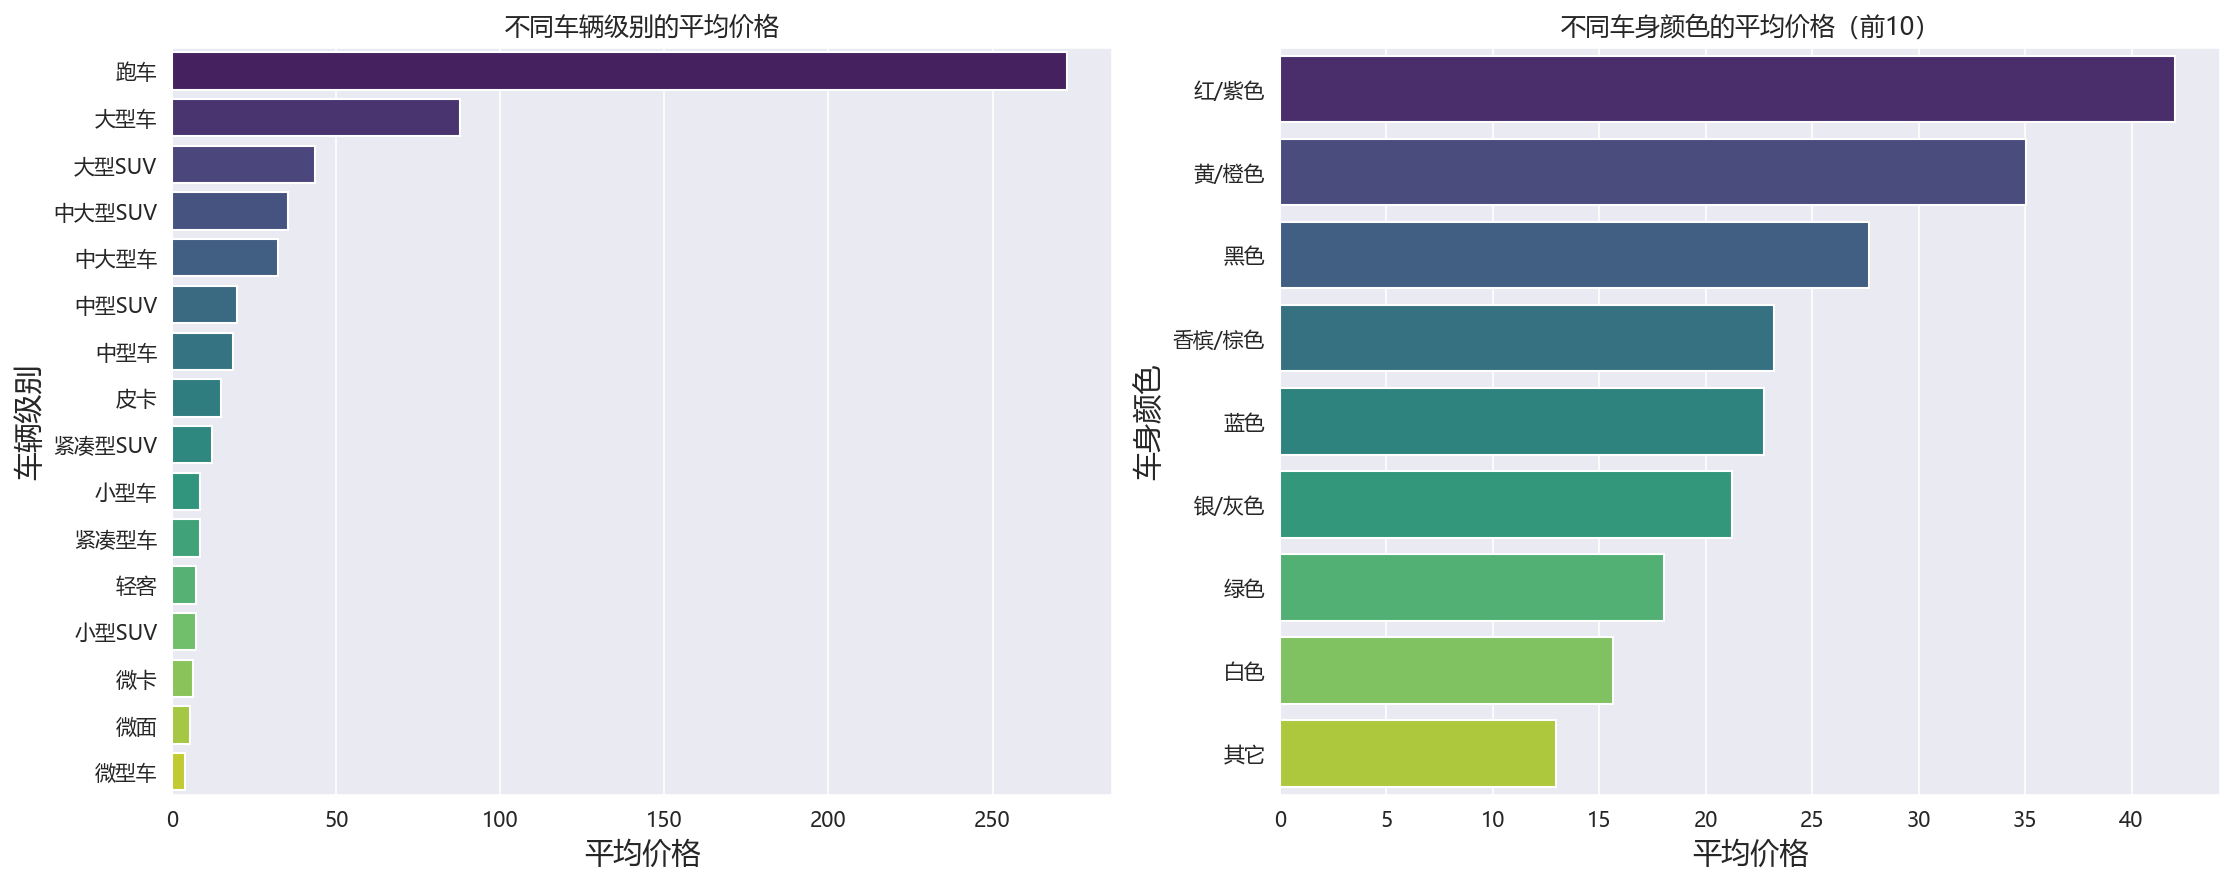

In [8]:


# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=150)

# Plot for '车辆级别'
sns.barplot(x=avg_price_by_level.values, y=avg_price_by_level.index, ax=ax1, palette="viridis")
ax1.set_title('不同车辆级别的平均价格')
ax1.set_xlabel('平均价格')
ax1.set_ylabel('车辆级别')

# Plot for '车身颜色'
sns.barplot(x=avg_price_by_color.values[:10], y=avg_price_by_color.index[:10], ax=ax2, palette="viridis")
ax2.set_title('不同车身颜色的平均价格（前10）')
ax2.set_xlabel('平均价格')
ax2.set_ylabel('车身颜色')

plt.tight_layout()
plt.show()



**分析结果：**  
- **车辆级别对价格的影响**：  
  - 从左侧的条形图中可以看出，不同车辆级别的平均价格有显著差异。例如，大型SUV的平均价格最高，而微型车和MPV的平均价格相对较低。  
- **车身颜色对价格的影响**：  
  - 右侧的条形图显示了不同车身颜色的平均价格（只展示了前10种颜色）。从图中可以看出，不同车身颜色的平均价格也有一定的差异。例如，黑色的车辆平均价格最高，而黄色的车辆平均价格相对较低。  
这些分析结果表明，车辆级别和车身颜色对车辆的价格都有一定的影响。这些信息对于购车者和车辆销售商来说可能非常有用。  


## Step 3. 燃料类型的占比分布（饼图）

In [9]:
# Count the number of records for each fuel type
fuel_type_counts = data['燃料类型'].value_counts()

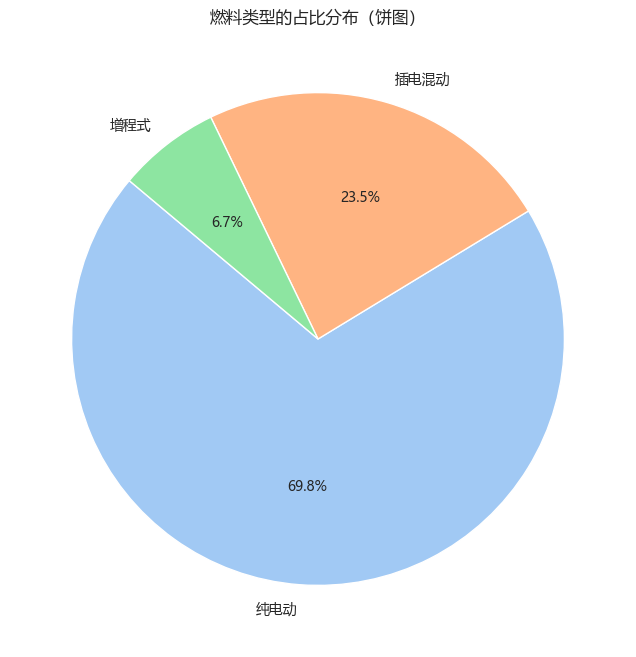

In [10]:
plt.figure(figsize=(8, 8))
fuel_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', len(fuel_type_counts)))
plt.title('燃料类型的占比分布（饼图）')
plt.ylabel('')
plt.show()


从饼图中我们可以更直观地看出不同燃料类型车辆的占比分布：  
- **纯电动**（Electric）车辆占据了最大的市场份额。  
- 其次是**汽油**（Petrol）车辆，也占据了相当大的比例。  
- **插电式混合动力**（Plug-in Hybrid）和**混合动力**（Hybrid）车辆的比例较小。  

这个饼图进一步强调了纯电动和汽油车辆在市场上的主导地位。  


## Step 4. 分析不同燃料类型的车辆的价格区间分布

要分析不同燃料类型的车辆的价格区间分布，我们可以采用以下步骤：  

数据分组：首先根据“燃料类型”对数据进行分组。  
计算每组的平均价格：这将帮助我们了解不同燃料类型车辆的平均价格。  
可视化：使用条形图来展示每个燃料类型的平均价格。

In [11]:
avg_price_by_fuel_type = data.groupby('燃料类型')['价格'].mean().sort_values(ascending=False)


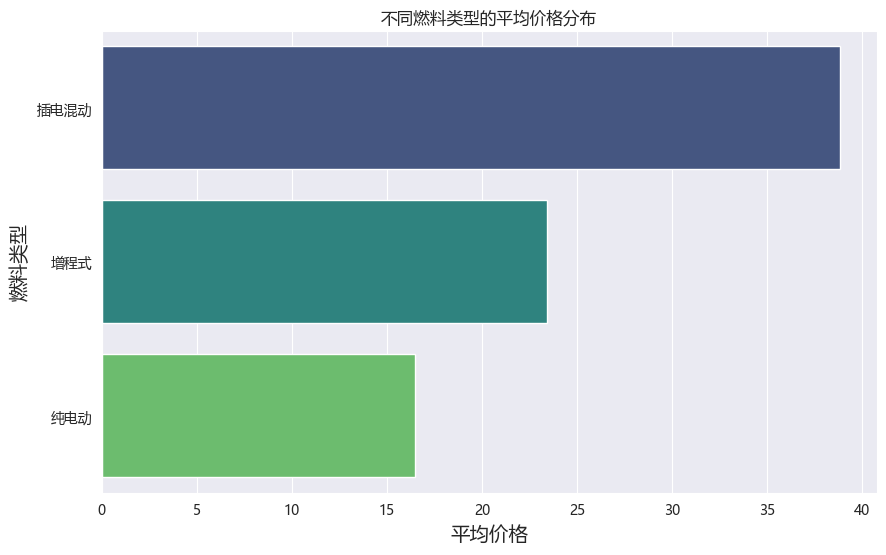

In [12]:

plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x=avg_price_by_fuel_type.values, y=avg_price_by_fuel_type.index, palette='viridis')
plt.title('不同燃料类型的平均价格分布')
plt.xlabel('平均价格')
plt.ylabel('燃料类型')
plt.show()


## Step 5. 车辆价格分布

In [13]:
def get_x(x):
    if x <= 10:
        return "低于10万"
    elif 10 < x < 20:
        return "10万~20万"
    elif 20 < x < 30:
        return "20万~30万"
    elif 30 < x < 40:
        return "30万~40万"
    elif 40 < x < 50:
        return "40万~50万"
    elif x > 50:
        return "大于50万"

In [14]:
data["价格分布"] = data["价格"].apply(lambda x:get_x(x))
price_distribution_counts = data['价格分布'].value_counts()

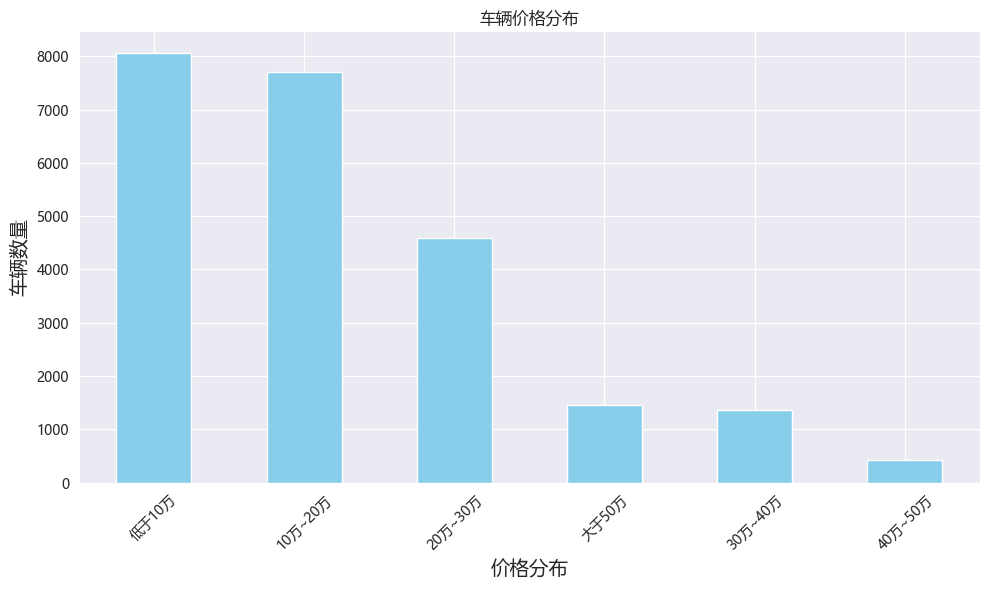

In [15]:

plt.figure(figsize=(10, 6), dpi=100)  # 设置 dpi 参数为 150，可根据需要调整
price_distribution_counts.plot(kind='bar', color='skyblue')
plt.title('车辆价格分布')
plt.xlabel('价格分布')
plt.ylabel('车辆数量')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
fuel_type_distribution = data.groupby(['燃料类型', '价格分布']).size().unstack().fillna(0)

fuel_type_distribution

价格分布,10万~20万,20万~30万,30万~40万,40万~50万,低于10万,大于50万
燃料类型,,,,,,
增程式,552,698,222,41,42,11
插电混动,1808,647,525,111,1563,891
纯电动,5339,3244,623,279,6461,545


## Step 6. 价格分布的不同类型车辆数量

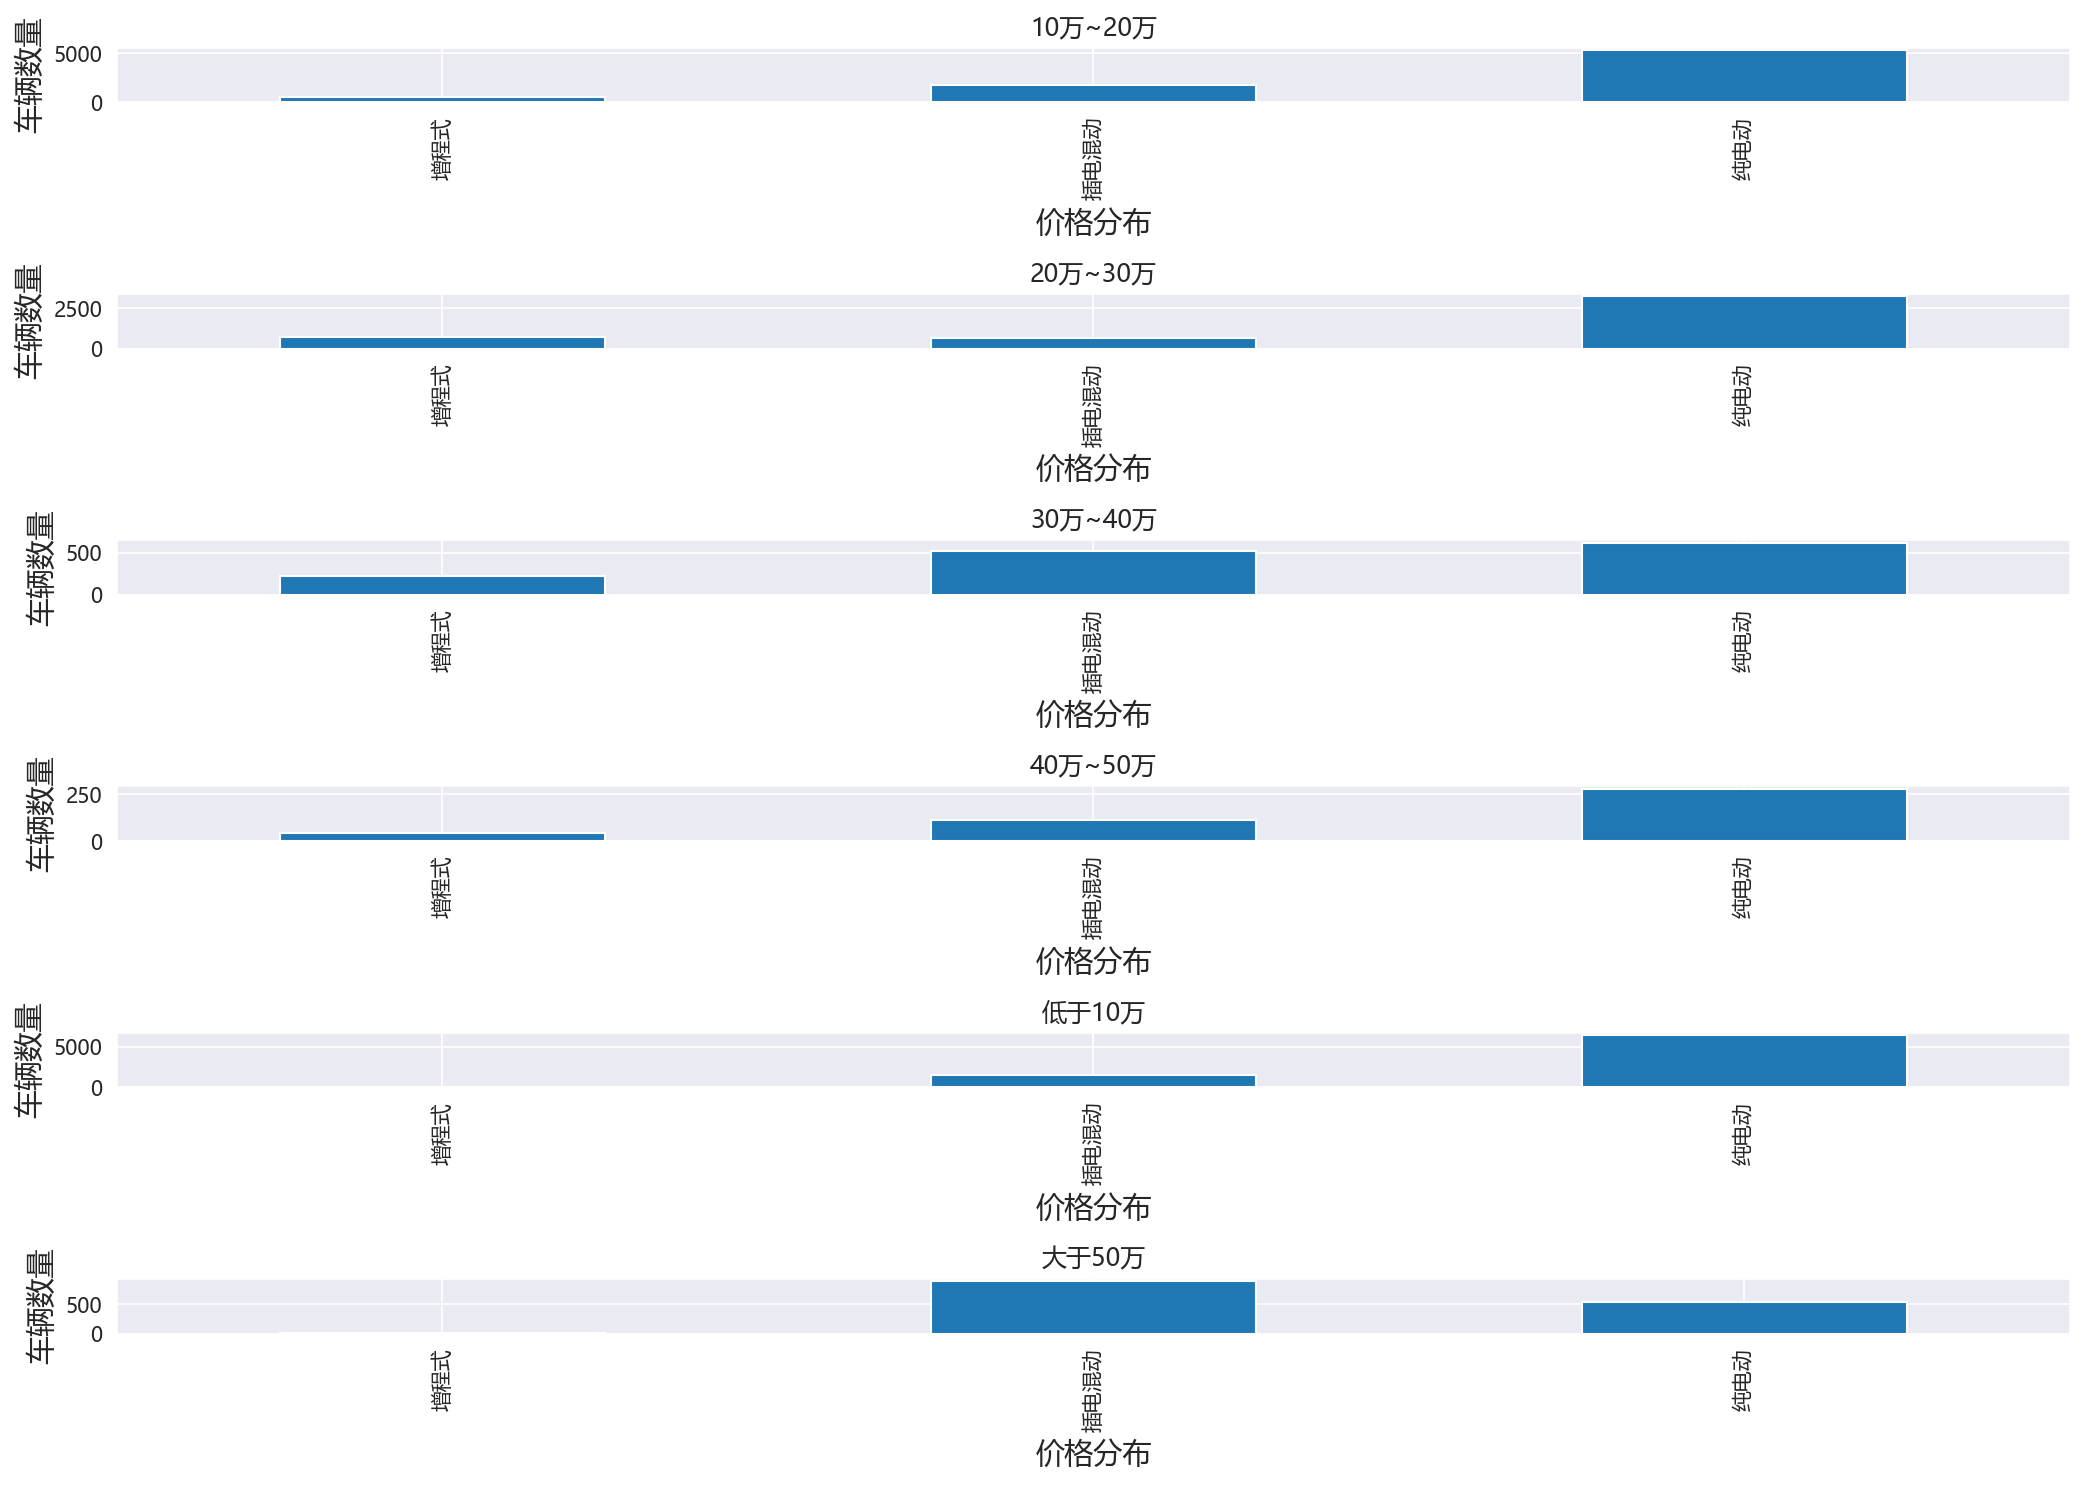

In [17]:
# Plotting using a different method
plt.figure(figsize=(14, 10), dpi=150)

# Iterate through each fuel type and plot its distribution
for i, fuel_type in enumerate(fuel_type_distribution.columns):
    ax = plt.subplot(len(fuel_type_distribution.columns), 1, i+1)
    fuel_type_distribution[fuel_type].plot(kind='bar', ax=ax)
    ax.set_title(fuel_type)
    ax.set_xlabel('价格分布')
    ax.set_ylabel('车辆数量')

plt.tight_layout()
plt.show()


可视化了不同燃料类型的价格分布。每个子图代表一种燃料类型的价格分布。从这些图表中，我们可以清楚地看到不同燃料类型车辆在不同价格区间的分布情况。

In [18]:
# 找到每种燃料类型中车辆数最多的价格分布
max_distribution = fuel_type_distribution.idxmax()

# 找到每种燃料类型中最常见价格分布的车辆数量
max_counts = fuel_type_distribution.max()

# 将结果组合成一个DataFrame
max_distribution_df = pd.DataFrame({
    '燃料类型': max_distribution.index,  # 燃料类型
    '最常见价格区间': max_distribution.values,  # 最常见的价格区间
    '车辆数量': max_counts  # 车辆数量
})

max_distribution_df


,燃料类型,最常见价格区间,车辆数量
价格分布,,,
10万~20万,10万~20万,纯电动,5339
20万~30万,20万~30万,纯电动,3244
30万~40万,30万~40万,纯电动,623
40万~50万,40万~50万,纯电动,279
低于10万,低于10万,纯电动,6461
大于50万,大于50万,插电混动,891


从上面的表格中，我们可以看到：  

- 对于纯电动车辆，车辆数量最多的价格区间是“低于10万”。  
- 对于插电混动车辆，车辆数量最多的价格区间是“大于50万”。

## Step 7. 不同车型的价格分布

In [19]:
data_1 = data[data["燃料类型"] == "增程式"]
data_2 = data[data["燃料类型"] == "插电混动"]
data_3 = data[data["燃料类型"] == "纯电动"]

In [20]:
data_1_by_fuel_type = data_1['价格分布'].value_counts()
data_2_by_fuel_type = data_2['价格分布'].value_counts()
data_3_by_fuel_type = data_3['价格分布'].value_counts()

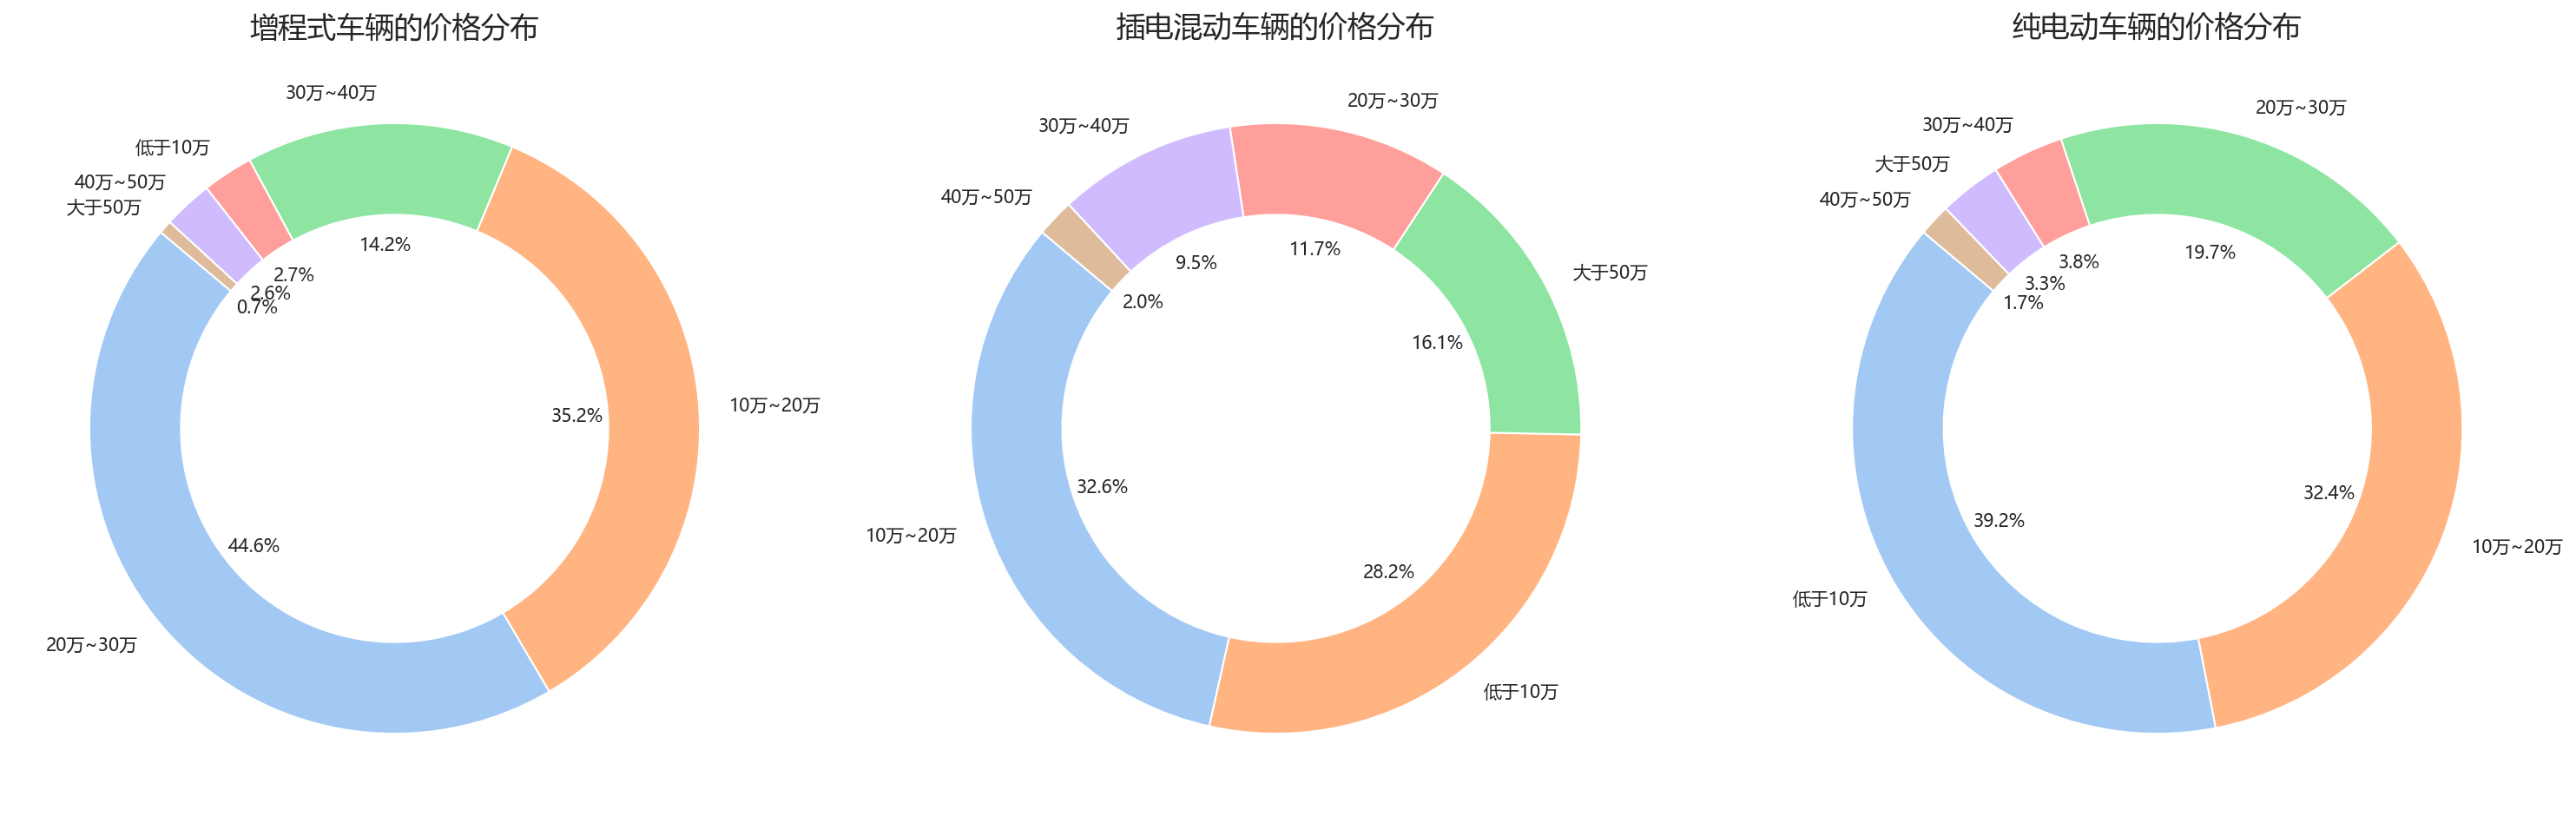

In [21]:

# Plotting the pie charts
fig, axes = plt.subplots(1, 3, figsize=(20, 18), dpi=150)

# Plot the first pie chart for 增程式
axes[0].pie(data_1_by_fuel_type.values, labels=data_1_by_fuel_type.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', len(data_1_by_fuel_type)), wedgeprops=dict(width=0.3))
axes[0].set_title('增程式车辆的价格分布', fontsize=16)

# Plot the second pie chart for 插电混动
axes[1].pie(data_2_by_fuel_type.values, labels=data_2_by_fuel_type.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', len(data_2_by_fuel_type)), wedgeprops=dict(width=0.3))
axes[1].set_title('插电混动车辆的价格分布', fontsize=16)

# Plot the third pie chart for 纯电动
axes[2].pie(data_3_by_fuel_type.values, labels=data_3_by_fuel_type.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', len(data_3_by_fuel_type)), wedgeprops=dict(width=0.3))
axes[2].set_title('纯电动车辆的价格分布', fontsize=16)


# Adjust layout
plt.tight_layout()

plt.show()


In [28]:
import pandas as pd

# 假设你的数据已经加载到了名为df的DataFrame中

# 提取品牌名称
data['品牌'] = data['标题'].str.split().str[0]

# 按品牌名称分组并计算每个品牌的成交次数
成交次数统计 = data.groupby('品牌').size().reset_index(name='成交次数')

# 输出成交次数统计结果
print(成交次数统计)


             品牌  成交次数
0          AION   651
1      ARIYA艾睿雅     9
2        Artura    16
3         C-MAX     1
4    Cayenne新能源   248
..          ...   ...
473     高合HiPhi   138
474      高尔夫・纯电    13
475  高尔夫新能源(进口)     9
476          魏牌    38
477         龙耀6     2

[478 rows x 2 columns]
